In [3]:
import tensorflow as tf # for machine learning and deep learning
import keras
from tensorflow.keras import layers, models # for building neural network models
import numpy as np # for numerical computations and array handling
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization


print('='*70)
print("TensorFlow version:", tf.__version__)
print('='*70)
print("All Packages Installed Successfully! ✅ ")
print('='*70)

TensorFlow version: 2.20.0
All Packages Installed Successfully! ✅ 


Importing Dataset from CSV File in Python

In [ ]:
db1 = pd.read_csv('Churn_Modelling.csv')
db1.head() # Display the first 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Static Summary of Data 

In [6]:
db1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Check for `null` values 

In [8]:
db1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Check for `na` values

In [9]:
db1.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Drop unnecessary columns

In [10]:
db1.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
db1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding
Changing data into numerical values
- **label encoding:** for binary categorical data, ordinal data
- **one hot encoding:** for more than two categorical data, non-ordinal data

Using One Hot Encoding for 'Geography' and 'Gender

In [17]:
db2 = pd.get_dummies(data=db1, columns=['Geography', 'Gender'], drop_first=False, dtype=int)
db2.head()  

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### Exploratory Data Analysis (EDA)

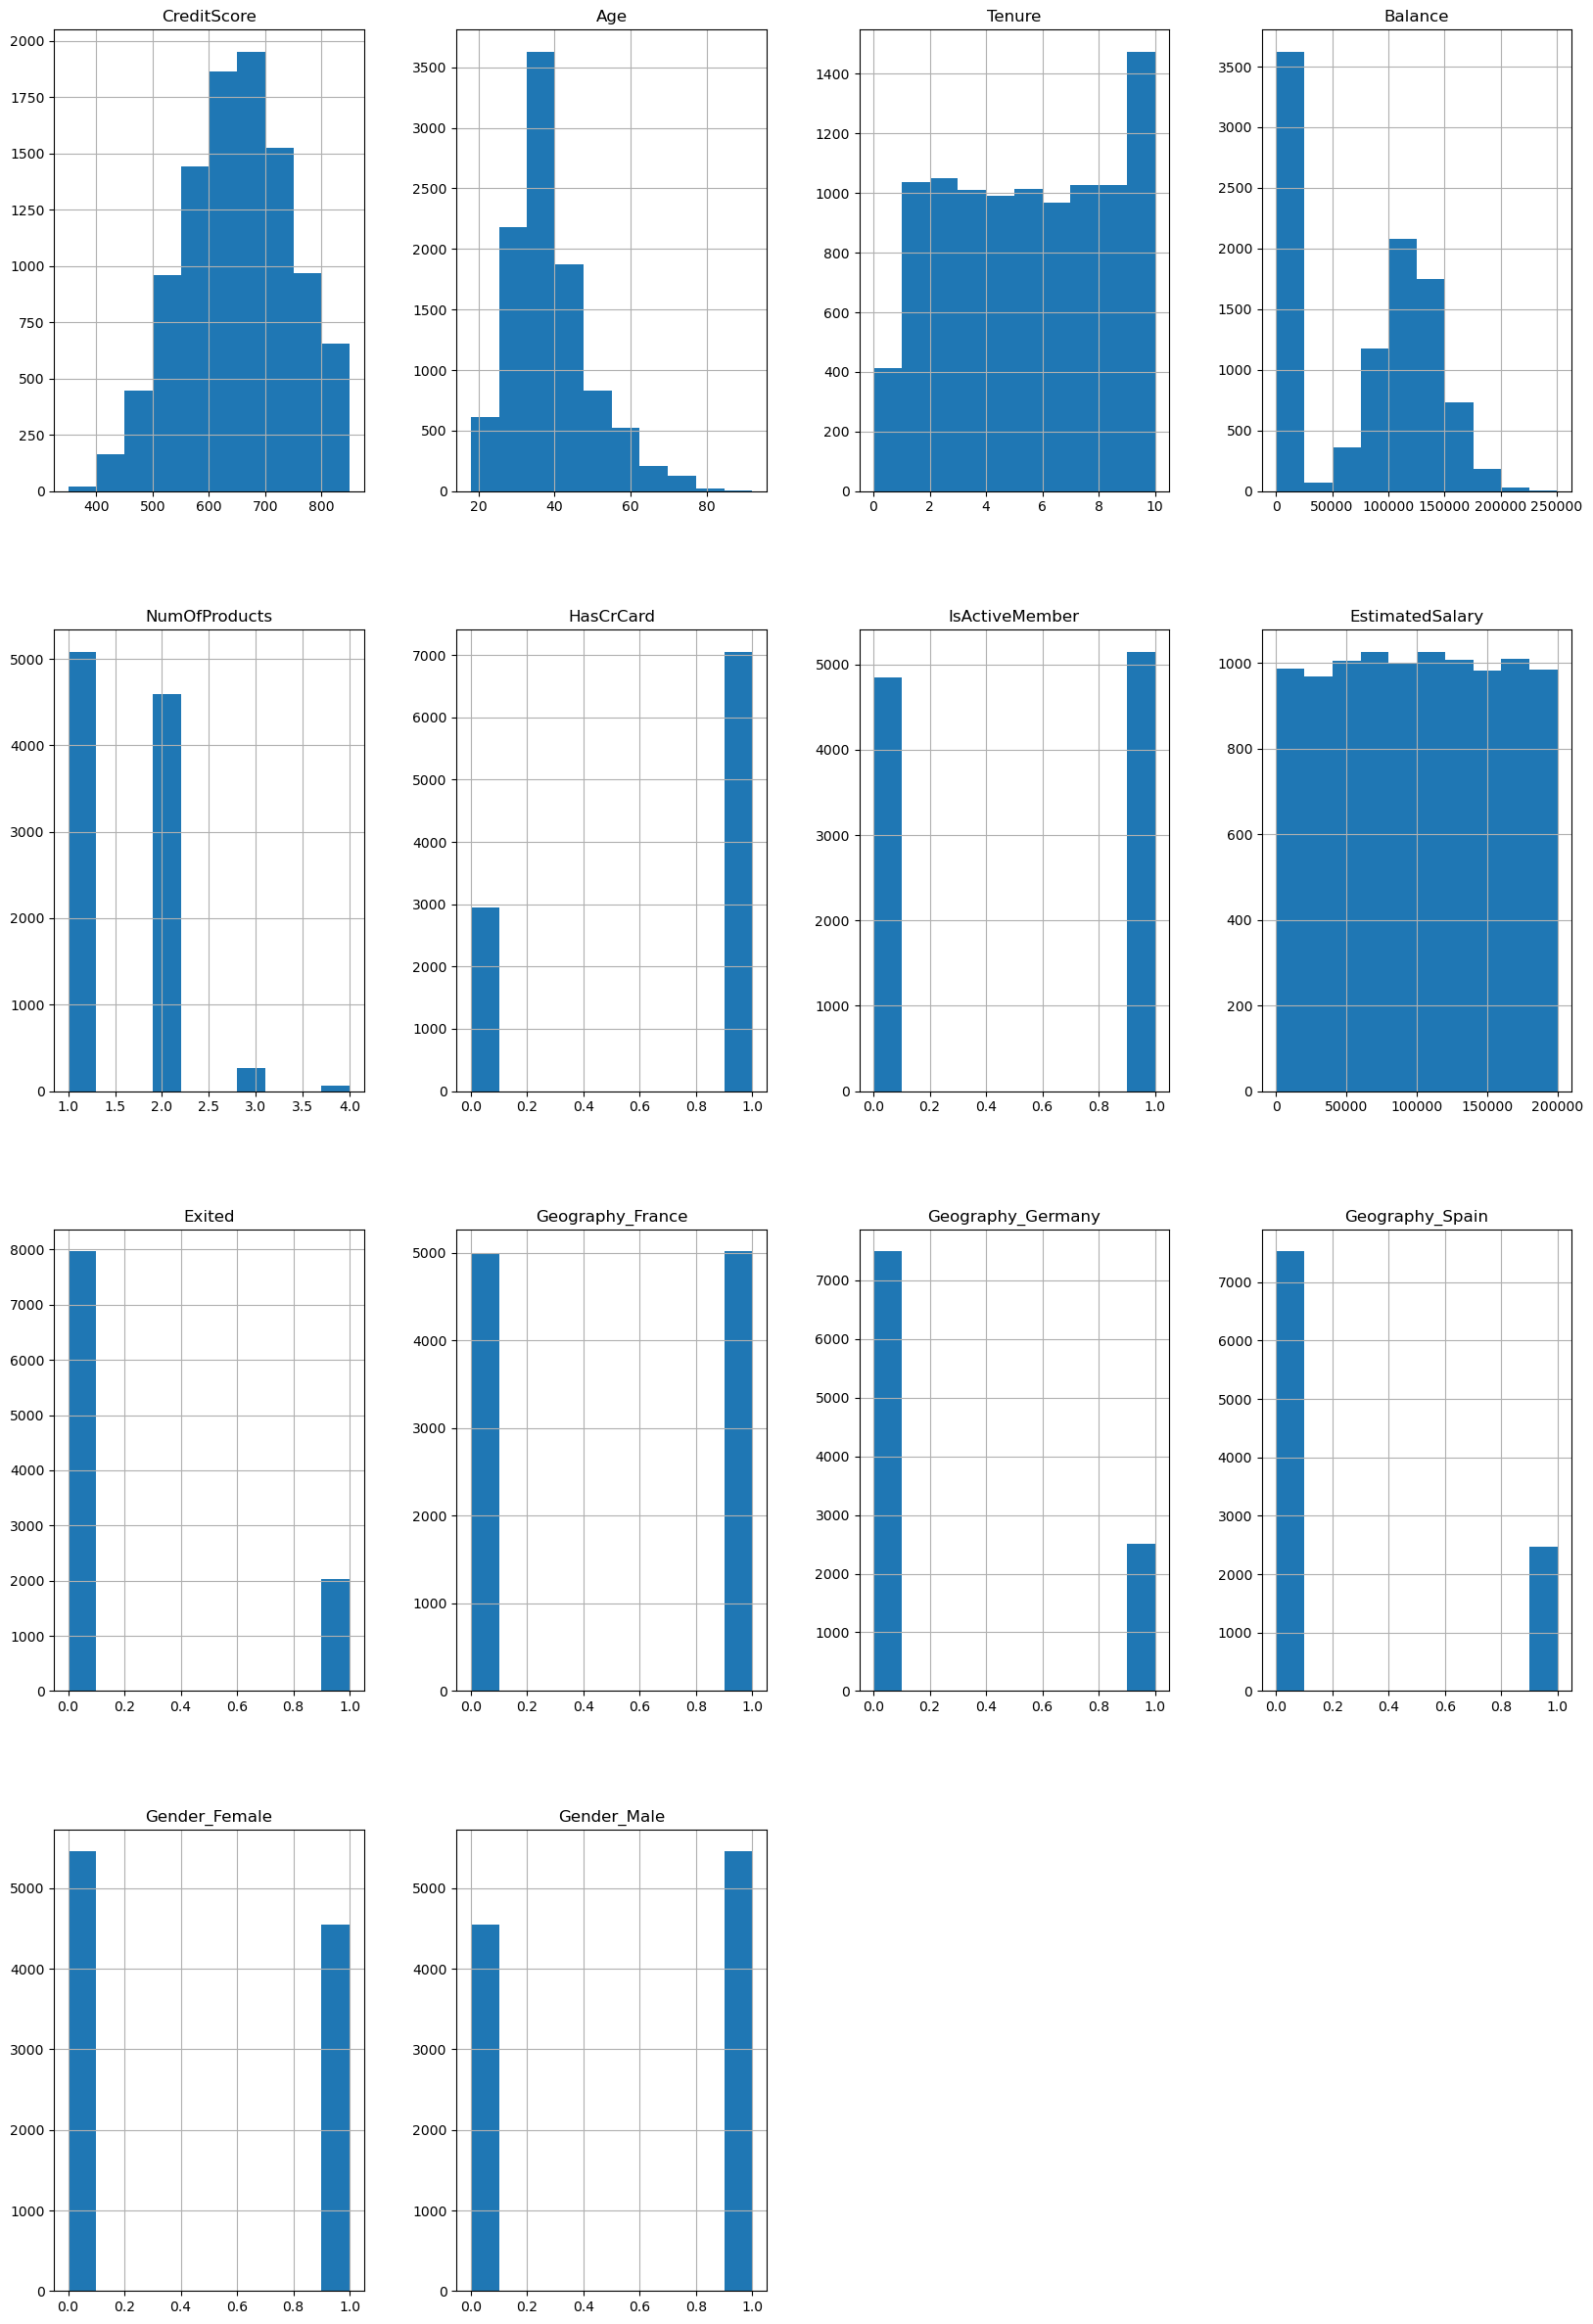

In [18]:
# Histogram
db2.hist(figsize=(20,30))
plt.title("Histograms Analysis", fontsize=16)
plt.show()

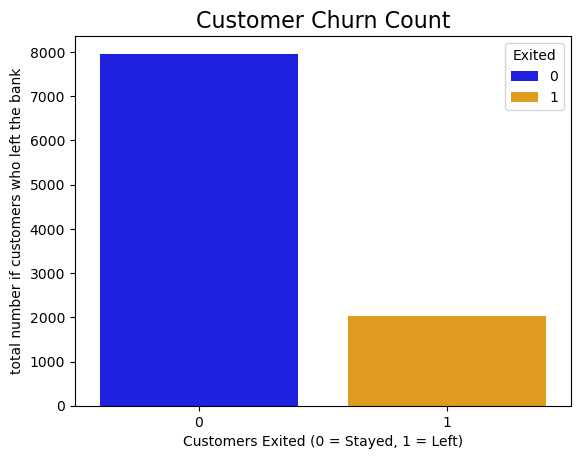

In [43]:
sns.countplot(x='Exited', data=db2, hue='Exited', palette=['blue', 'orange'])
plt.ylabel("total number if customers who left the bank")
plt.xlabel("Customers Exited (0 = Stayed, 1 = Left)")
plt.title("Customer Churn Count", fontsize=16)
plt.show()

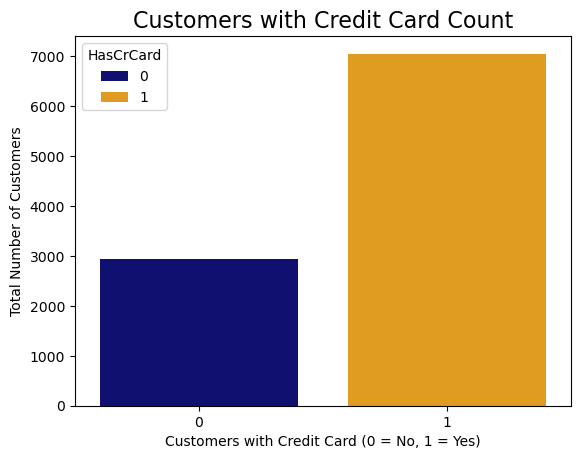

In [42]:
sns.countplot(x="HasCrCard", data=db2, hue="HasCrCard", palette=['navy', 'orange'])
plt.ylabel("Total Number of Customers")
plt.xlabel("Customers with Credit Card (0 = No, 1 = Yes)")
plt.title("Customers with Credit Card Count", fontsize=16)
plt.show()


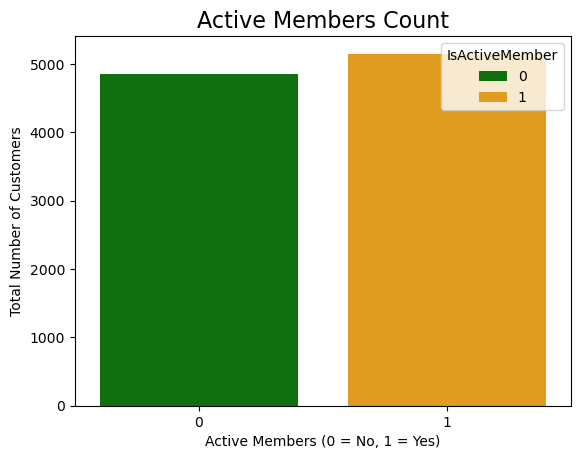

In [41]:
sns.countplot(x='IsActiveMember', data=db2, hue='IsActiveMember', palette=['green', 'orange'])
plt.ylabel("Total Number of Customers")
plt.xlabel("Active Members (0 = No, 1 = Yes)")
plt.title("Active Members Count", fontsize=16)
plt.show()

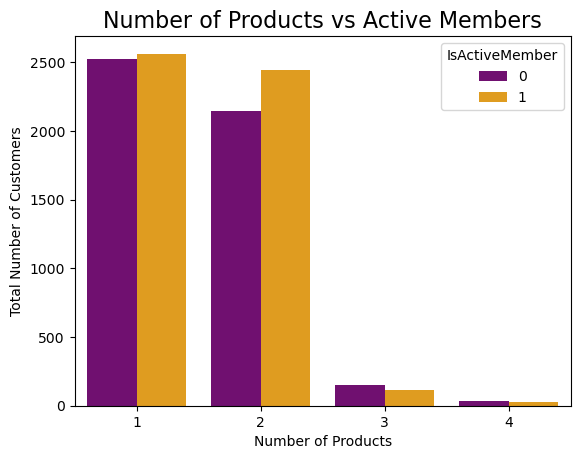

In [40]:
sns.countplot(x='NumOfProducts', hue='IsActiveMember', data=db2, palette=['purple', 'orange'])
plt.ylabel("Total Number of Customers")
plt.xlabel("Number of Products")
plt.title("Number of Products vs Active Members", fontsize=16)
plt.show()

### Preparation of Dataset for Model
**x variables** is independent variables

**y variables** are target variable

In [44]:
x = db2.iloc[:, db2.columns != 'Exited']
y = db2.iloc[:, db2.columns == 'Exited']

### Splitting Dataset into Training and Test Set

from sklearn.model_selection import train_test_split

divide data into training and testing sets with 80% for training and 20% for testing

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
print(y_train)

      Exited
7389       0
9275       0
2995       0
5316       0
356        0
...      ...
9225       0
4859       0
3264       0
9845       0
2732       1

[8000 rows x 1 columns]


### Feature Scaling
**StandardScaler:** substracts the mean and scales to unit variance
- Transfor the data in such a maner it has a mean of 0 and a standard deviation of 1
- Standarizes data 

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Creating ANN (Artificial Neural Network) Model

In [51]:
from keras.models import Sequential
from keras.layers import Dense

# Inintialize the ANN

classifier = Sequential() 

# Adding first input layer and hidden layer 
# The more number of hidden layers, the more accurate the model will be, but it will also take more time to train

classifier.add(Dense(units=7, kernel_initializer='uniform', activation='relu', input_dim=13))

# Adding second hidden layer
classifier.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))

# Adding output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# training the ANN on the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100


/opt/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step - accuracy: 0.7955 - loss: 0.4820
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.7960 - loss: 0.4290
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8016 - loss: 0.4249
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8250 - loss: 0.4187
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8288 - loss: 0.4133
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8299 - loss: 0.4090
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8325 - loss: 0.4057
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8346 - loss: 0.4040
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8340 - loss: 0.4013
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8349 - loss: 0.4003
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8347 - loss: 0.3996
Epoch 12/100
800/800 ━━━━━━━━━━

In [52]:
# Make predictions and evaluate the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary output
print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [53]:
# Make confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1555   40]
 [ 227  178]]


<function matplotlib.pyplot.show(close=None, block=None)>

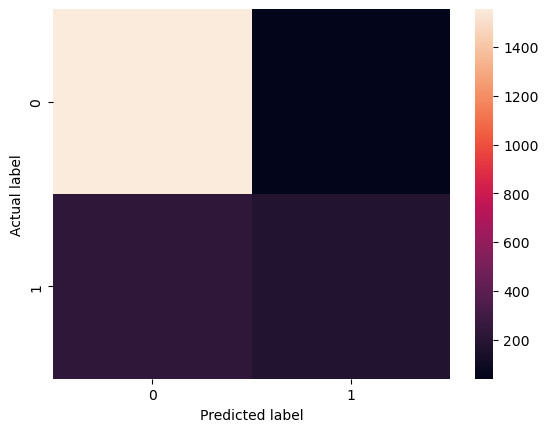

In [54]:
sns.heatmap(pd.DataFrame(cm))
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show

### Diffrent metrics to evaluate the model
<!-- - **Confusion Matrix:** a table that is used to evaluate the performance of a classification model -->
- **Accuracy:** the ratio of correctly predicted observations to the total observations
- **Precision:** the ratio of correctly predicted positive observations to the total predicted positives
- **Recall (Sensitivity):** the ratio of correctly predicted positive observations to the all observations in actual class
- **F1 Score:** the weighted average of Precision and Recall    


In [56]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
# print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8665
Precision: 0.8165137614678899
Recall: 0.43950617283950616


In [61]:
# Prediction based on single observation

new_pred = classifier.predict(sc.transform(np.array([[608, 41, 1, 83807.86, 1, 0, 1, 112542.58, 0, 0, 1, 1, 0]])))
new_pred = (new_pred > 0.5)
print(new_pred)

if new_pred[0][0]:
    print("Prediction: Customer will LEAVE the bank (Churn)")
else:
    print("Prediction: Customer will STAY with the bank")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[False]]
Prediction: Customer will STAY with the bank


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
